# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [1]:
# epsilion
# min_data/min_sample
# core points
# border points
# noise points


In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [56]:
X, y = make_blobs(n_samples=1000, centers=4,cluster_std=0.6,
                  random_state=0)

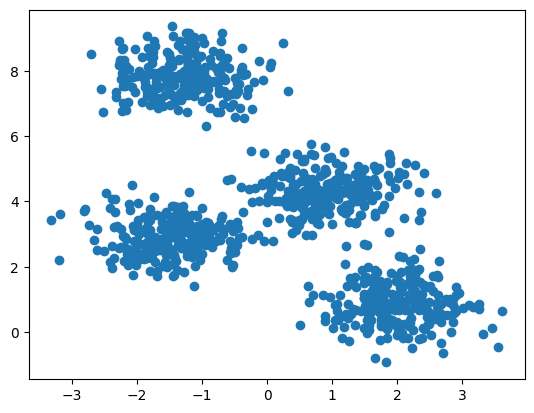

In [57]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [98]:
model = DBSCAN(eps = 0.3,min_samples = 4)
model.fit(X)

DBSCAN(eps=0.3, min_samples=4)

In [99]:
cls = model.labels_

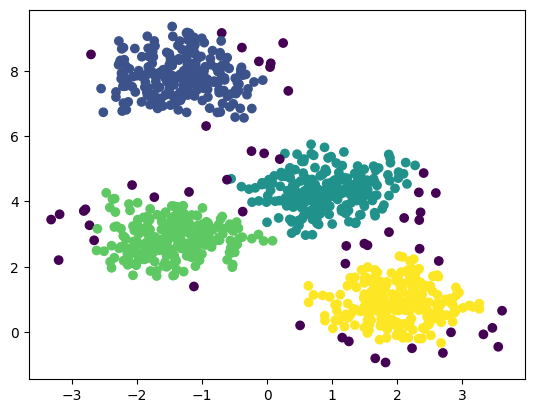

In [100]:
plt.scatter(X[:,0],X[:,1],c  = cls)
plt.show()

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
# -100, -75, -50, 0,50, 75, 100

In [103]:
# 5*100/7

In [104]:
# 6*100/7

In [105]:
silhouette_score(X,cls)

0.6307860442215394

In [109]:
from sklearn.model_selection import cross_val_score,GridSearchCV


array([0. , 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1. ])

In [117]:
param = {'eps':np.round(np.linspace(0.1,1,10),1), 'min_samples':range(4,7)}
# model = GridSearchCV(DBSCAN(),param_grid=param,return_train_score=False)

# model.fit(X)

In [139]:
import time
all_param = {"eps":[],'min_samples':[],'silhouette_score':[]}

for i in param['eps']:
    for j in param['min_samples']:
        model = DBSCAN(eps=i,min_samples=j)
        model.fit(X)
        cls = model.labels_
        score = silhouette_score(X,cls)
        
        all_param['eps'].append(i)
        all_param['min_samples'].append(j)
        all_param['silhouette_score'].append(score)
        
        plt.scatter(X[:,0],X[:,1],c  = cls)
        
        plt.annotate(text = f'''        eps: {i}
        bsample: {j}
        bscore: {round(score,2)}''',xy = (2,8))
        
        plt.show()
        
        display(clear=True)
#         time.sleep(1)
performance_table = pd.DataFrame(all_param)
performance_table.sort_values(by='silhouette_score',ascending=False).head(1)

,eps,min_samples,silhouette_score
6,0.3,4,0.630786


In [122]:
max_score = performance_table['silhouette_score'].max()
performance_table[performance_table['silhouette_score'] == max_score]

,eps,min_samples,silhouette_score
6,0.3,4,0.630786


In [141]:
# import os
# os.getcwd()

In [142]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [143]:
X = df.iloc[:,[2,4]]
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


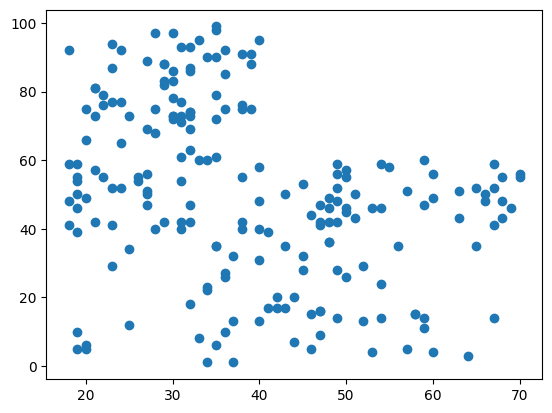

In [146]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.show()

In [147]:
model = DBSCAN(eps = 0.3,min_samples = 4)
model.fit(X)

DBSCAN(eps=0.3, min_samples=4)

In [154]:
import time
# model = DBSCAN(eps = 1,min_samples = 4)
model.fit(X)
param = {'eps':range(1,5), 'min_samples':range(2,5)}

all_param = {"eps":[],'min_samples':[],'silhouette_score':[]}

for i in param['eps']:
    for j in param['min_samples']:
        model = DBSCAN(eps=i,min_samples=j)
        model.fit(X)
        cls = model.labels_
        score = silhouette_score(X,cls)
        
        all_param['eps'].append(i)
        all_param['min_samples'].append(j)
        all_param['silhouette_score'].append(score)
        
        plt.scatter(X.iloc[:,0],X.iloc[:,1],c = cls)
        
        plt.annotate(text = f'''        eps: {i}
        bsample: {j}
        bscore: {round(score,2)}''',xy = (2,8))
        
        plt.show()
        
        display(clear=True)
#         time.sleep(1)
performance_table = pd.DataFrame(all_param)
performance_table.sort_values(by='silhouette_score',ascending=False).head(1)

,eps,min_samples,silhouette_score
6,3,2,0.247686


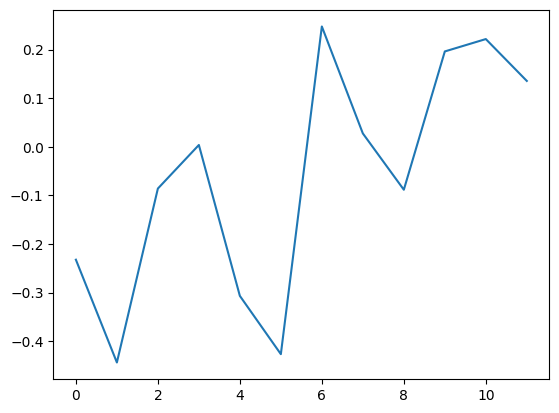

In [157]:
performance_table['silhouette_score'].plot()
plt.show()

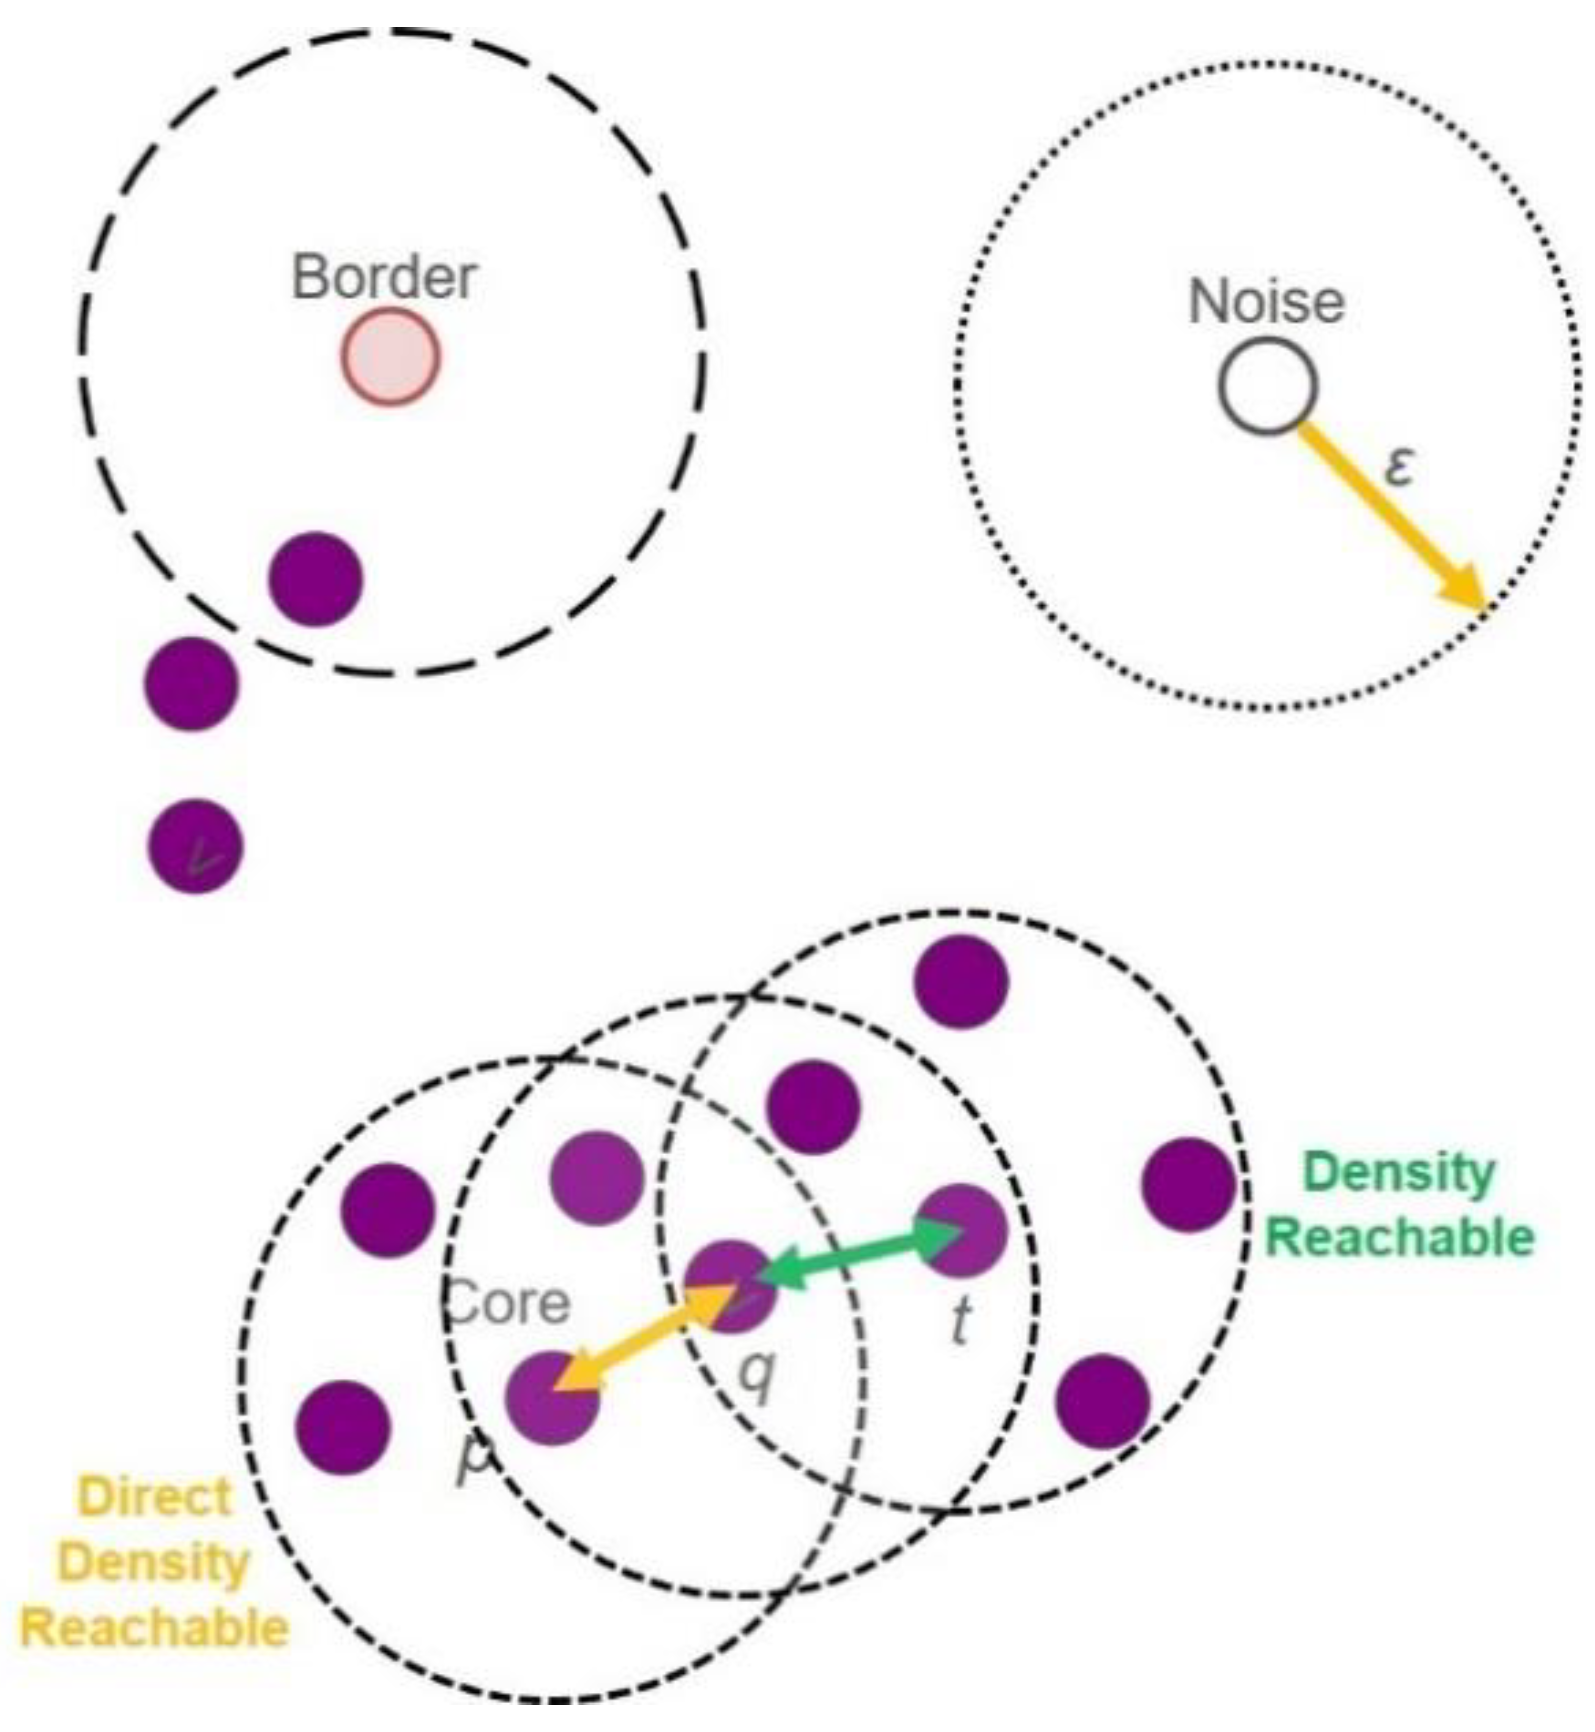

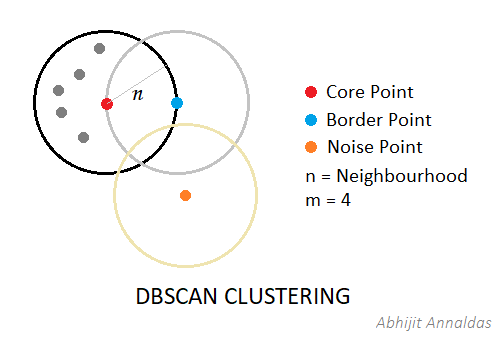

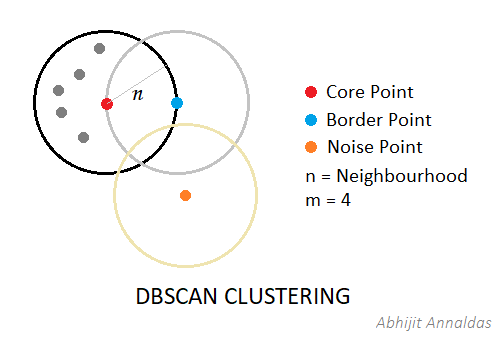

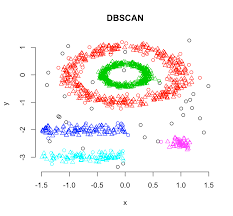

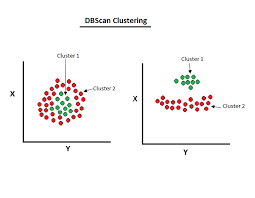

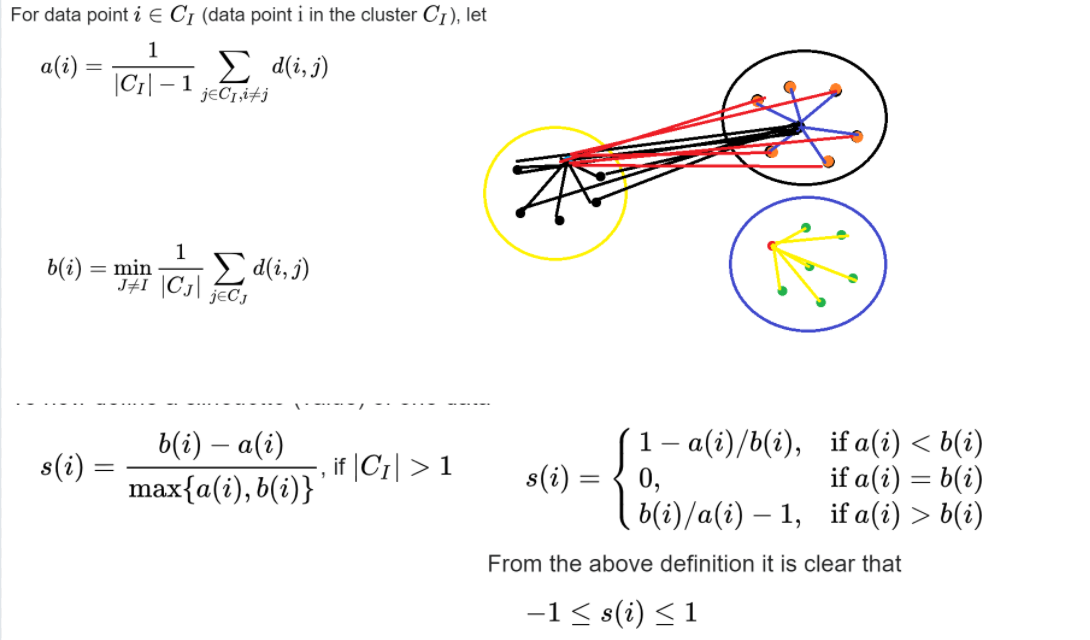